In [1]:
import pandas as tian
# tian.set_option("display.max_rows", None)
tian.set_option('display.max_columns', None)
import seaborn as sns
import builtins
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
def df_deets(df_or_names):
    def print_info(df, df_name):
        print(f"{df_name}:")
        if hasattr(builtins, "display"):
            display(df)
        else:
            print(df)
        print("\n")
        
        summary_df = tian.DataFrame({
            "Data types": df.dtypes,
            "Duplicates": [df.duplicated(subset=[col]).sum() for col in df.columns],
            "NAs": df.isna().sum().values,
            "Distinct values": df.nunique().values
        }).set_index(df.columns)
        
        print(f"{df_name} summary:")
        if hasattr(builtins, "display"):
            display(summary_df)
        else:
            print(summary_df)
        print("\n")
        print(df.columns)
        print("\n")
        total_duplicates = df.duplicated().sum()
        print(f"Total number of duplicate rows in {df_name}: {total_duplicates}\n")

    if isinstance(df_or_names, list): 
        for item in df_or_names:
            if isinstance(item, str):
                df = globals()[item] 
                print_info(df, item)
            else:
                print_info(item, "dataframe")
    else: 
        if isinstance(df_or_names, str):
            df = globals()[df_or_names]  
            print_info(df, df_or_names)
        else:
            print_info(df_or_names, "dataframe")

In [4]:
bp_artist_label_names_df = tian.read_parquet('/Users/uwsthoughts/Desktop/dolly_shield_data/hf_dolly_shield_repo/artist_label_files/bp_artist_label_names_cache.parquet')

In [ ]:
bp_artist_track_df = tian.read_parquet('/Users/uwsthoughts/Desktop/dolly_shield_data/hf_dolly_shield_repo/artist_label_files/bp_artist_track_cache.parquet')


In [5]:
df_deets(bp_artist_label_names_df)

dataframe:


,label_id,label_name,artist_id,artist_name,label_url,artist_url
0,2527,Nano Records,31526,Tromesa,beatport.com/label/nano-records/2527,beatport.com/artist/tromesa/31526
1,2527,Nano Records,943790,Magik (UK),beatport.com/label/nano-records/2527,beatport.com/artist/magik-uk/943790
2,3222,Permanent Vacation,1027936,Abdul Raeva,beatport.com/label/permanent-vacation/3222,beatport.com/artist/abdul-raeva/1027936
3,24479,Metrohm,806738,Gerwin Van Engelenburg,beatport.com/label/metrohm/24479,beatport.com/artist/gerwin-van-engelenburg/806738
4,24479,Metrohm,42053,Angelo D'onorio,beatport.com/label/metrohm/24479,beatport.com/artist/angelo-donorio/42053
...,...,...,...,...,...,...
3458175,25380,Nice 'N' Ripe,255240,The Dangerous Brothers,beatport.com/label/nice-n-ripe/25380,beatport.com/artist/the-dangerous-brothers/255240
3458176,13837,Easy Street Records,140688,Synctotem,beatport.com/label/easy-street-records/13837,beatport.com/artist/synctotem/140688
3458177,25380,Nice 'N' Ripe,255958,2 Taboo,beatport.com/label/nice-n-ripe/25380,beatport.com/artist/2-taboo/255958
3458178,15303,Madhouse Records,598598,50%%,beatport.com/label/madhouse-records/15303,beatport.com/artist/50/598598




dataframe summary:


,Data types,Duplicates,NAs,Distinct values
label_id,int64,3379897,0,78283
label_name,object,3380184,5,77995
artist_id,int64,2633420,0,824760
artist_name,object,2633957,0,824223
label_url,object,3379897,0,78283
artist_url,object,2633420,0,824760




Index(['label_id', 'label_name', 'artist_id', 'artist_name', 'label_url',
       'artist_url'],
      dtype='object')


Total number of duplicate rows in dataframe: 0



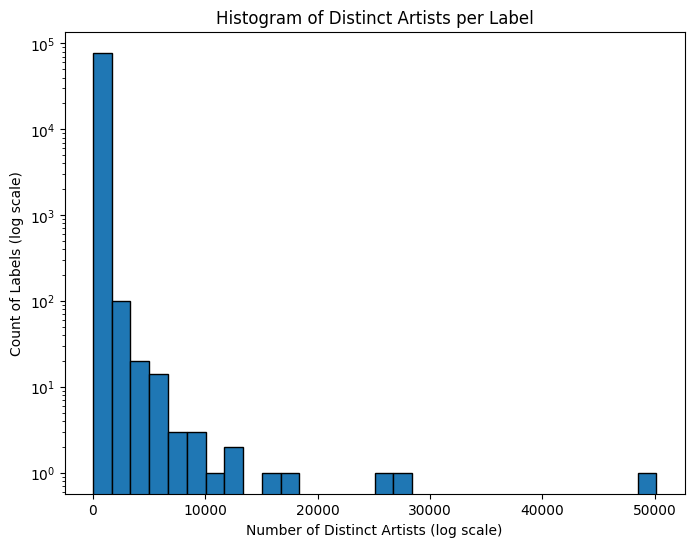

In [10]:
label_artist_counts = bp_artist_label_names_df.groupby("aritst")["artist_id"].nunique()  

# Plot histogram  
plt.figure(figsize=(8, 6))  
plt.hist(label_artist_counts, bins=30, edgecolor="black")  
plt.xlabel("Number of Distinct Artists ")  
plt.ylabel("Count of Labels (log scale)")  
plt.title("Histogram of Distinct Artists per Label")  
plt.yscale("log")  # Log scale on y-axis  
# plt.xscale("log")  # Log scale on x-axis  
plt.show()  